In [35]:
#Import pakage
import numpy as np
import pandas as pd
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

Class 2 HW

In [45]:
# read data
file_location = "/Users/yujieliu/Desktop/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)



In [46]:
# for any given experiment_id, return a list group by date
def GetSeries(my_data, my_id, my_country, my_vertical):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == my_country) & (my_data.vertical == my_vertical)]
    series = my_data.groupby('date')['spend_usd'].sum().cumsum()
    return(series)

In [50]:
# for any two series, plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(),
        columns = ["experiment", "control"]
    )
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label= "Experiment")
    ax.plot(control_series, color="blue", label = "Control")

    # some tweaks
    ax.set_title("Experiment (Red) vs. Control (Blue)")
    ax.set_ylabel("Total spend ($)")
    ax.grid(True, which="both")
    
    # change legend
    ax.legend(loc = 'upper left')
    
    # format date
    plt.gcf().autofmt_xdate()

In [56]:
def PrintCumTimeSeries(my_data, experiment_ids, my_country, my_vertical):
    # make sure our x-axis is consistent
    date_series = my_data.date
    index_series = np.unique(date_series) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0], my_country, my_vertical)
    control_series = GetSeries(my_data, experiment_ids[1], my_country, my_vertical)
    
    PlotSeries(index_series, treatment_series, control_series)
    

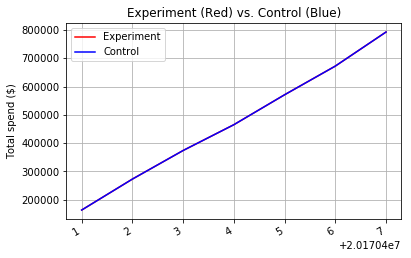

In [57]:
PrintCumTimeSeries(my_data, [12624548,12624549],"JP","ANDROID_APPS")